In [1]:
# Fill in the wandb_id assigned to your demo run!
#wandb_id = 'molv6au8'
#wandb_id = '1c0e8ywk'
#wandb_id = 'geyksq4j'# sample num:130/ answer nums:10 / 无 transform
#wandb_id = 'unadflaw'# sample num:130/ answer nums:10 / 有 transform
#wandb_id = 'bunh4baz'# sample num:130/ answer nums:100 / 有 transform
#wandb_id =  wfg0y1g1

# wandb_id,sample num,answer nums, 有无 transform
#info = ['geyksq4j',130,10,True]
info = ['wfg0y1g1',130,100,False]
info = ['vmvrp3bg',130,20,True]
info = ['14p5jxvo',130,20,False]
sample_num = info[1]
answer_nums = info[2]
isTransformation = info[3]
wandb_id = info[0]
if wandb_id == 'YOUR_ID':
    raise ValueError('Need to provide wandb_id of demo run!')

In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import wandb
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Helper Functions

def restore_file(wandb_id, filename='wandb-summary.json'):
    files_dir = 'notebooks/restored_files'    
    os.system(f'mkdir -p {files_dir}')

    api = wandb.Api()
    run = api.run(f'semantic_uncertainty/{wandb_id}')

    path = f'{files_dir}/{filename}'
    os.system(f'rm -rf {path}')
    run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
    with open(path, 'r') as f:
        out = json.load(f)
    return out

def get_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy', 'p_false']
    df = df.set_index('method').loc[main_methods].reset_index()
    main_names = ['Semantic entropy', 'Discrete Semantic Entropy', 'Naive Entropy', 'p(True)']
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

In [4]:
def get_t_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy', 'p_false']
    df = df.set_index('method').loc[main_methods].reset_index()
    # 新的名字添加 transformation 前缀
    main_names = [
        'transformation_semantic_entropy', 
        'transformation_cluster_assignment_entropy', 
        'transformation_regular_entropy', 
        'transformation_p_false'
    ]
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

In [5]:


results = restore_file(wandb_id)


if isTransformation:
    unc_df = get_t_uncertainty_df(results)
else:
    unc_df = get_uncertainty_df(results)


output_path = f"/home/yw699/codes/MLLM-hallu/result/{sample_num}_{answer_nums}_{isTransformation}.csv"
unc_df.to_csv(output_path, index=False)

print(f"结果已保存为 {output_path}")


结果已保存为 /home/yw699/codes/MLLM-hallu/result/130_20_False.csv


<Figure size 1200x600 with 0 Axes>

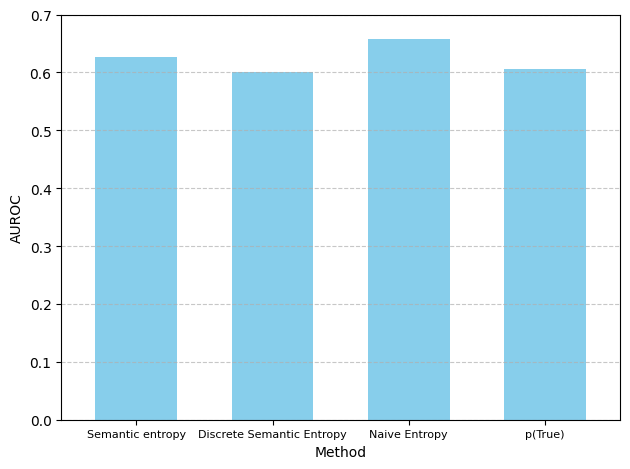

In [6]:
import matplotlib.pyplot as plt

# 设置 metric 值
metric = 'AUROC'
plt.figure(figsize=(12, 6))  # 增加图表宽度
# 绘制柱状图
ax = unc_df.set_index('metric').loc[metric].plot.bar(
    x='method', y='means', color='skyblue', legend=False, width=0.6
)

# 设置 Y 轴标签
ax.set_ylabel(metric)

# 设置 X 轴标签和旋转
ax.set_xlabel('Method')
ax.tick_params(axis='x', rotation=0, labelsize=8)

# 添加网格线
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 设置 Y 轴范围
ax.set_ylim(0, 0.7)

# 添加标题
plt.title("")

# 优化布局
plt.tight_layout()

# 显示图表
plt.show()

(0.5, 0.7)

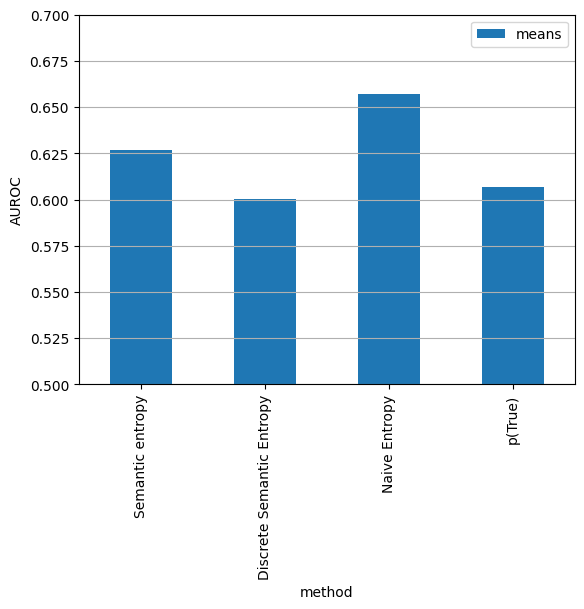

In [7]:
metric = 'AUROC'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.5, 0.7)